# The Sparks Foundation - Data Science & Business Analytics intern
## Task 1 : Prediction using Supervised Machine Learning
## Author : Houssem Jabally

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

## Importing Dataset

In [2]:
# Importing Data

df = pd.read_csv ('http://bit.ly/w-data')

# Reading Data

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
# Checking for null values in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking if there's a missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Hours - 0%
Scores - 0%


In [6]:
# Data Types of columns

print(df.dtypes)

Hours     float64
Scores      int64
dtype: object


In [7]:
# Data Description

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# Finding unique Data
df.nunique()

Hours     23
Scores    23
dtype: int64

In [9]:
# Checking for duplicate values

df.duplicated().sum()

0

## Visualizing the Data

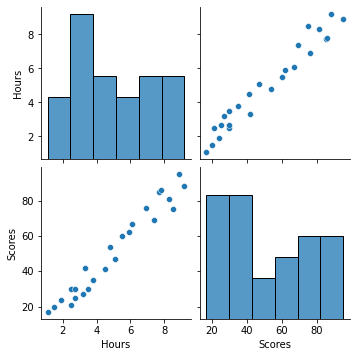

In [10]:
# Visualizing the Data using the pair plot

sns.pairplot(df)

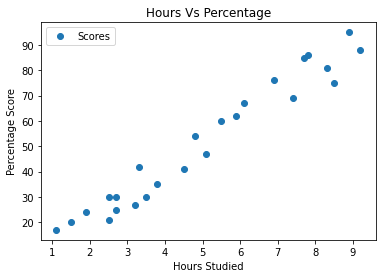

In [11]:
# plotting the distribution of score

df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### We can see that there is a positive linear relation between number of study hours and percentage score. Therefore,we can say that as the study time increases the percentage score will also increase.

## Preparing the Data

In [12]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the algorithm

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## Plotting the Data

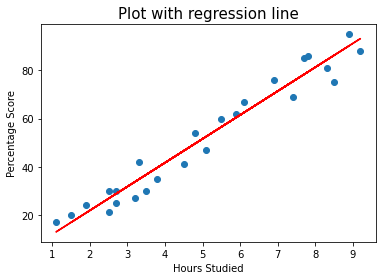

In [15]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data

plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.title("Plot with regression line",fontsize=15,color='black')
plt.xlabel('Hours Studied',fontsize=10,color='black')
plt.ylabel('Percentage Score',fontsize=10,color='black')
plt.show()

## Making Predictions

In [16]:
print(X_test) # Testing data in Hours

y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## What would be the predicted score if a student studies for 9.25 hours per day?

In [18]:
# Test with your own data

hours = 9.25
own_pred = regressor.predict([[hours]])
print("The Predicted Score if a student studies for",hours,"hours is",own_pred[0])

The Predicted Score if a student studies for 9.25 hours is 93.69173248737535


## Evaluating the Model

In [19]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))  

Mean Absolute Error: 4.183859899002975
